# Introduzione

In questo notebook si andrà a prendere uno dei datasets che scikit-learn ci mette a disposizione che in questo caso è il dataset dei vini, si raccoglieranno diverse informazioni su esso, si sceglierà un modello di apprendimento e si valuterà la sua performance.

Il dataset **"wine"** della libreria scikit-learn contiene i risultati di un'analisi chimica dei vini coltivati in una specifica area d'Italia. Sono stati raccolti 13 analisi chimiche diverse in 178 campioni e ad essi è stato assegnata una etichetta che può essere 0, 1 o 2.

## Caricamento librerie e dataset

Nella cella seguente si caricheranno le librerie utili per caricare il dataset e per svolgere delle analisi su esso.

In [1]:
# importo delle librerie necessarie per fare l'analisi
import pandas as pd
import seaborn as sns
import numpy as np

# importo dataset wine
from sklearn import datasets

wine = datasets.load_wine()
X, y = wine.data, wine.target
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

## EDA 

In [2]:
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

Da questo primo comando si possono capire da che colonne è formato il dataset:

* **alcohol**: Alcool 
* **malic_acid**: Acido malico
* **ash**: Cenere
* **alcalinity_of_ash**: Alcalinità della cenere
* **magnesium**: Magnesio
* **total_phenols**: Fenoli totali
* **flavanoids**: flavonoidi
* **nonflavanoid_phenols**: Fenoli non flavonoidi
* **proanthocyanins**: Proantocianine
* **color_intensity** Intensità del colore
* **hue**: Tinta
* **od280/od315_of_diluted_wines**: D280/OD315 di vini diluiti
* **proline**: Prolina
* **target**: Etichetta assegnata al vino che può essere 0, 1 o 2

Per analizzare meglio il dataset carichiamo una nuova libreria chiamata ProfileReport che ci permette di ricavare moltissime informazioni che vedremo in seguito.

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(wine)

In [4]:
profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Con due righe di codice e dopo aver aspettato la generazione del report la libreria fornisce moltissime informazioni:

A livello generico si nota come si hanno 178 campioni e 14 variabili dove 13 sono features ed una è la label. Inoltre si nota come non ci siano celle non compilate con dei valori o dei campioni duplicati.

Il report fornisce per ogni variabile diverse informazioni come il numero di numeri distinti con la sua percentuale, la media di quella colonna, il minimo e il massimo, il numero dei dati nulli e con la sua percentuale, dei dati che valgono 0 e dei dati che valgono infinito e le loro rispettive percentuale. Inoltre genera un istogramma o un grafico a barre di quella variabile in base al suo tipo ovvero numerica o categorica.

Sintetizziamo le informazioni principali per ogni variabile nelle righe seguenti:

* **alcohol**
    * no valori mancanti, valori 0 e valori infinito
    * media 13 circa
    * range min-max che va da 11.03 a 14.83
    
* **malic_acid**
    * no valori mancanti, valori 0 e valori infinito
    * media 2.34 circa
    * range min-max che va da 0.74 a 5.8

* **ash**
    * no valori mancanti, valori 0 e valori infinito
    * media 2.37 circa
    * range min-max che va da 1.36 a 3.23
    
* **alcalinity_of_ash**
    * no valori mancanti, valori 0 e valori infinito
    * media 19.49 circa
    * range min-max che va da 10.6 a 30
    
* **magnesium**
    * no valori mancanti, valori 0 e valori infinito
    * media 99.74 circa
    * range min-max che va da 70 a 162
    
* **total_phenols**
    * no valori mancanti, valori 0 e valori infinito
    * media 2.30 circa
    * range min-max che va da 0.98 a 3.88
    
* **flavanoids**
    * no valori mancanti, valori 0 e valori infinito
    * media 2.03 circa
    * range min-max che va da 0.34 a 5.08
    
* **nonflavanoid_phenols**
    * no valori mancanti, valori 0 e valori infinito
    * media 0.36 circa
    * range min-max che va da 0.13 a 0.66
    
* **proanthocyanins**
    * no valori mancanti, valori 0 e valori infinito
    * media 1.59 circa
    * range min-max che va da 0.41 a 3.58
    
* **color_intensity**
    * no valori mancanti, valori 0 e valori infinito
    * media 5.06 circa
    * range min-max che va da 1.28 a 13
    
* **hue**
    * no valori mancanti, valori 0 e valori infinito
    * media 0.96 circa
    * range min-max che va da 0.48 a 1.78
    
* **OD280/OD315_of_diluted_wined**
    * no valori mancanti, valori 0 e valori infinito
    * media 2.61 circa
    * range min-max che va da 1.27 a 4
    
* **proline**
    * no valori mancanti, valori 0 e valori infinito
    * media 746.89 circa
    * range min-max che va da 278 a 1680
    
* **target**
    * classe 0 59 volte
    * classe 1 71 volte
    * classe 2 48 volte
    
Oltre a queste informazioni nel report è possibile visualizzare uno grafico iterattivo ove è possibile visualizzare uno scatterplot in due dimensioni tra 2 variabili a scelta tra le presenti variabili numeriche. Presente anche una matrice di correlazione di 3 tipi che vediamo in seguito, un grafico dei valori mancanti, le prime 10 righe e le ultime 10.

Dall'analisi delle features e della label si notano diverse cose come classi molto sbilanciate tra loro, per esempio **proline** ha un range di valore che va da 278 a 1680 mentre tutte le classi tranne **magnesium** hanno un range di valori e gli stessi valori molto più piccoli, per ovviare ciò in seguito verrà fatta la scalatura della features in modo che in fase di addestramento del modello la features proline non abbia molto più peso rispetto che alle altre variabili.  

Nelle righe seguenti si vedranno meglio le correlazioni tra le variabili.

Prima di continuare rendiamo la variabile target tramite codifica one-hot una variabile numerica. 

Perchè scomodarsi a fare ciò? Questo si fa la maggior parte dei modelli non riconosce le variabili categoriche cosi come scritte ma sa distinguere le categorie soltanto tramite variabili binarie.

In [11]:
df1 = pd.get_dummies(wine, columns=['target'])
 
df1 = df1[['target_0.0', 'target_1.0', 'target_2.0']]
df = pd.concat([wine, df1], axis=1).reindex(wine.index)

df.drop('target', axis=1, inplace=True)
 
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target_0.0  target_1.0  target_2.0  
0                            3.92   1065.0           1           0           0  
1                            3.40   1050.0           1           0           0  
2                            3.17   1185.0           1           0           0  
3                            3.45   1480.0           1           0           0  
4                            2.93    735.0           1           0           0  
..                            ...      ...         ...         ...         ...  
173                          1.74    740.0           0           0           1  
174                          1.56    750.0           0           0           1  
175                          1.56    835.0           0           0           1  
176                          1.62    840.0           0           0           1  
177                          1.60    560.0           0           0           1  

[178 rows x 16 columns]

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target_0.0                    0.647232   -0.205847  0.229268   
target_1.0                   -0.726383  

<AxesSubplot:>

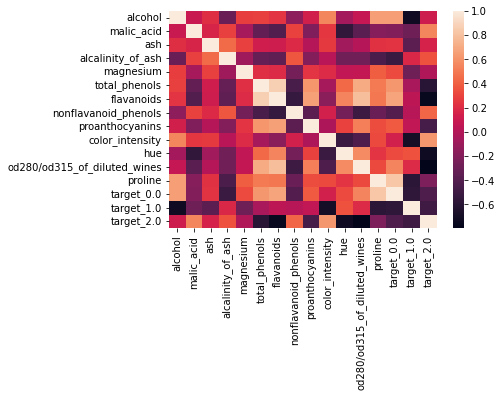

In [13]:
print(df.corr())
sns.heatmap(df.corr())

Da queste informazione si può notare come la classe 0 della variabile target sembra correlata maggiormente alle seguenti variabili:

* **proline** con circa 0.83
* **flavanoid** con circa 0.67
* **alcohol** con circa 0.65
* **total_phenols** con circa 0.61

La classe 1 invece non ha nessuna correlazione forte ma la features a cui sembra maggiormente correlata è:

* **hue** con circa 0.35

Ed infine la classe 2 sembra correlata maggiormente a:

* **color_intensity** con circa 0.61
* **malic_acid** con circa 0.54

## Scelta modello e preparazione dei dati

Il modello che andremo a preparare per questo set di dati è il k-nearest Neighborn (KNN). KNN è un algoritmo di apprendimento automatico supervisionato (ovvero lavora con dati con conosciuta la loro etichetta) semplice e facile da implementare. Esso lavora calcolando la distanza fra i punti ad n dimensioni che segue la stessa logica di distanza punto a punto del piano cartesiano a due dimensioni. In sostanza un modello di questo tipo prende un nuovo dato, guarda i primi k vicini e assegna una label prendendo la classe più frequente (moda) di essi se la variabile target è di classificazione come in questo caso, altrimenti prende la media dei primi k valori se la variabile target fosse un valore numerico.

Per prima cosa si andrà a caricare la libreria per utilizzare questo tipo di algoritmo

Prima di procedere però bisogna importare altre librerie utili come il train_test_split che divide le features X e le label y in 4 parti:

* X_train e y_train che andranno ad "allenare" il modello 
* X_test e y_test che serviranno per validare il modello

Questo procedimento si usa perchè il modello chiaramente non può essere validato con gli stessi dati con cui viene addestrato.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.9596774193548387


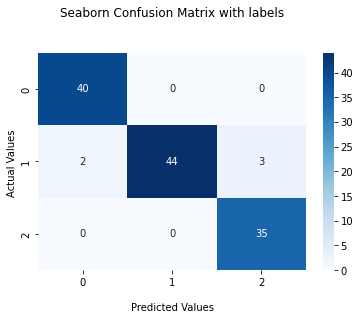

In [15]:
train_pred = knn_model.predict(X_train)

print(f'Accuracy: {accuracy_score(y_train, train_pred)}')

cf_matrix = confusion_matrix(y_train, train_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

Non possiamo dire direttamente che l'accuratezza è una misura scarsa da valutare. Quando i dati sono bilanciati, l'accuratezza è una buona misura per valutare il nostro modello. D'altra parte, se i dati sono sbilanciati, l'accuratezza non è una misura di valutazione corretta.

Questo è il risultato del modello che tenta di prevedere i dati con cui si è allenato. Come prevedibile le previsioni sono molto accurate, da notare come gli errori siano nel prevedere la classe 1, che già in data analysis si era scoperto come fosse la classe meno correlata alle features. 

Accuracy: 0.9629629629629629


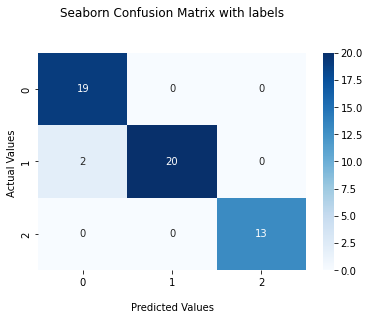

In [16]:
y_pred = knn_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In questo caso si ha un'accuratezza del 96.2% e la matrice di confusione sopra mostra più nel dettaglio come si comporta il nostro modello. Dalla matrice sopra si nota come il modello abbia dei problemi a rilevare la classe 1, come visto sopra, è la classe che ha una correlazione relativamente bassa con tutte le altre features. Vediamo adesso se con altre tecniche è possibile migliorare il modello.

# 1. Cross Validation
 
La Cross Validation è infatti una tecnica statistica che permette di usare in modo alternato i dati sia per il train che per il test. Essa consiste nei seguenti passaggi:

1. divide il training dataset in k parti
2. Le parti n-1 vengono utilizzate per l'allenamento mentre la parte rimanente viene utilizzata per il test.
3. Calcolo l'accuratezza.
4. Ripete n volte i punti 2 e 3 per X volte.
5. Infine, il risultato della Convalida incrociata è la media dei risultati ottenuti su ciascun set.

Questa tecnica viene usata per evitare problemi di overfitting e di campionamento assimetrico. 

make_pipeline permette semplicemente di applicare la scalatura dei dati durante la convalida incrociata.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

knn_model = make_pipeline(scaler, knn_model)
accuracy = cross_val_score(knn_model, X_train, y_train, scoring='accuracy', cv=10)

print(accuracy)

print(f"Accuratezza modello con convalida incrociata: {accuracy.mean()*100}")

[0.76923077 0.92307692 0.92307692 1.         0.91666667 1.
 1.         1.         0.91666667 1.        ]
Accuratezza modello con convalida incrociata: 94.48717948717949


Questa tecnica permette di ottenere una accuratezza media del dataset di circa 94,5%. Adesso vediamo come trovare un k migliore.

## 2. Test valori k migliori per i modelli
Adesso vediamo con l'ausilio della libreria GridSearchCV il miglior valore di k per il nostro modello.

In [18]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy',
                    return_train_score=False, verbose=1)

grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [19]:
print(grid_search.best_params_)

{'n_neighbors': 5}


In [20]:
accuracy = grid_search.best_score_ *100
print(f"Accuracy for our training dataset with tuning is : {grid_search.best_score_}" )

Accuracy for our training dataset with tuning is : 0.9685897435897436


Dopo questa prova si ottiene che il miglior valore di k da un range da 1 a 15 sia di 5 con una accuratezza di circa 96.9% dei dati di train. Adesso vediamo l'accuratezza nel test data

Accuracy: 1.0


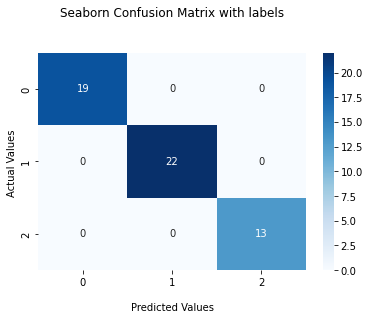

In [21]:
final_model = knn_model.set_params(**grid_search.best_params_)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In questo caso dato il ridotto numero di test set si riesce ad ottenere una accuratezza del 100%. 

# Conclusione

In questo notebook si è visto come è fatto il dataset wine della libreria sklearn esaminando diverse caratteristiche generali come il numero dei vini di questo dataset, la spiegazione di tutte le features dove si è andato più a fondo in ognuna di esse e si è analizzato anche la correlazione fra tutte loro con la label.

In seguito si è scelto il modello e lo si è migliorato inserendo due tecniche come la cross validation e il GridSearchCV.